<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Image-Classification/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Residual Networks (ResNet)

##Importing Libraries

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

##Preparing the data

### Loading dataset

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Reshape the data

In [19]:
# Reshape the data to include the channel dimension (28x28 grayscale to 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

### Converting to 3 channels and resizing to 32x32

In [20]:
# Convert grayscale to RGB (3 channels) and resize to 32x32 for ResNet50
x_train = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train)), [32, 32])
x_test = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test)), [32, 32])

### Converting tensors to numpy arrays

In [21]:
# Convert Tensors to numpy arrays (to avoid TensorFlow undefined shape issues)
x_train = x_train.numpy()
x_test = x_test.numpy()

### Encoding the labels

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##Creating the model

### Load the ResNet50 model

In [23]:
# Load the ResNet50 model, pre-trained on ImageNet, excluding the top layer
# Input shape is now (32, 32, 3) to match the resized RGB MNIST images
resnet = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

### Build the model

In [24]:
model = models.Sequential()

### Adding Layers

In [25]:
model.add(layers.InputLayer(input_shape=(32, 32, 3)))
model.add(resnet)
model.add(layers.GlobalAveragePooling2D())  # Reduce the output of ResNet50 to a vector
model.add(layers.Dense(128, activation='relu'))  # Add a fully connected layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

### Compiling with optimizer and loss function

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Summarizing the model

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23851274 (90.99 MB)
Trainable params: 23798154 (90.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


##Training the model

In [28]:
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1)


Epoch 1/3
938/938 [==============================] - 265s 265ms/step - loss: 0.2444 - accuracy: 0.9299
Epoch 2/3
938/938 [==============================] - 248s 265ms/step - loss: 0.0861 - accuracy: 0.9759
Epoch 3/3
938/938 [==============================] - 248s 264ms/step - loss: 0.0778 - accuracy: 0.9785


##Model Evaluation

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 16s - loss: 0.0496 - accuracy: 0.9864 - 16s/epoch - 50ms/step

Test accuracy: 0.9864000082015991


##Plotting prediction results

### Predicted values

313/313 [==============================] - 15s 48ms/step


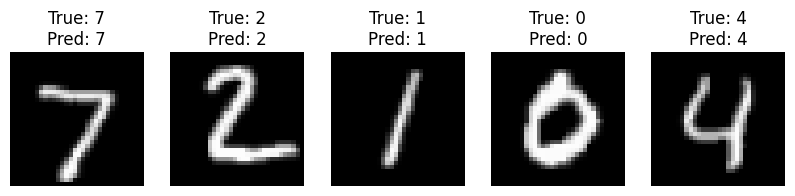

In [31]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)

def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(32, 32, 3), cmap='gray')
        plt.title(f"True: {np.argmax(labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')

    plt.show()

plot_images(x_test, y_test, predictions)

##Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [33]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

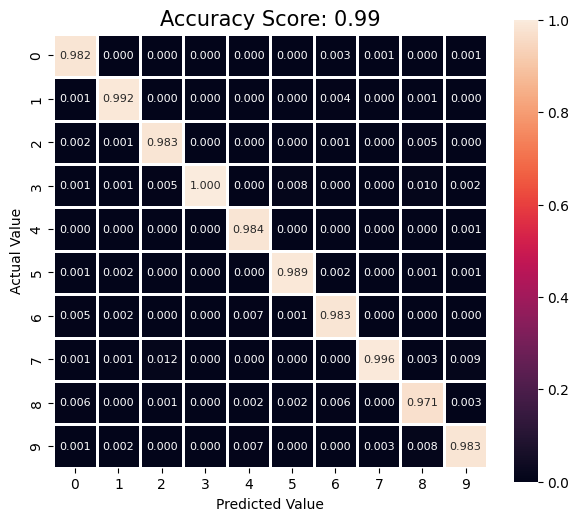

In [34]:
#Convert y_test to single-integer format if it's one-hot encoded
if y_test.ndim == 2:
    y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.75, square = True, annot_kws={"size": 8})
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.2f}'.format(test_acc), size = 15)
plt.show()